In [16]:
%load_ext autoreload
%autoreload 2

# 训练 Conv-LSTM 模型。
# 该模型通过同一个月的前 14 天的 SST 数据预测未来 1 天的 SST 数据。

# 导入数据集
from torch.utils.data import DataLoader

from src.dataset.ERA5 import ERA5SstDataset

# 定义参数
offset = 1461
width = 15
step = 15
lon = [60, 80]
lat=[160, 180]

# 创建全新的数据集
data_set = ERA5SstDataset(width, step, offset, lon, lat)
train_dataloader = DataLoader(data_set, batch_size=10, shuffle=False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from lightning import Trainer

from src.models.LSTM import ConvLSTM

model = ConvLSTM(3, 5, kernel_size=(5,5), num_layers=5, batch_first=True)
trainer = Trainer()
trainer.fit(model, train_dataloaders=train_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | cell_list | ModuleList | 24.1 K | train
-------------------------------------------------
24.1 K    Trainable params
0         Non-trainable params
24.1 K    Total params
0.096     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 0:   0%|          | 0/61 [00:00<?, ?it/s] 
[2000-01-01 - 2000-01-16]

[2000-01-16 - 2000-01-31]

[2000-01-31 - 2000-02-15]

[2000-02-15 - 2000-03-01]

[2000-03-01 - 2000-03-16]

[2000-03-16 - 2000-03-31]

[2000-03-31 - 2000-04-15]

[2000-04-15 - 2000-04-30]

[2000-04-30 - 2000-05-15]

[2000-05-15 - 2000-05-30]
torch.Size([10, 14, 1, 80, 80])
torch.Size([10, 1, 80, 80])
0
layer: 0, h: torch.Size([10, 5, 80, 80]), c: torch.Size([10, 5, 80, 80])
conv: torch.Size([10, 6, 80, 80])


RuntimeError: Given groups=1, weight of size [20, 8, 5, 5], expected input[10, 6, 80, 80] to have 8 channels, but got 6 channels instead

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.7860
3.7859721183776855
(80, 80)
torch.Size([80, 80])
[[22.247377 22.41906  22.343895 ... 22.352243 22.269157 21.954636]
 [22.90997  22.93119  22.889067 ... 22.884296 22.783146 22.62184 ]
 [23.378513 23.162025 23.073885 ... 23.05627  23.016504 22.888039]
 ...
 [27.254232 27.270996 27.275501 ... 27.274231 27.248262 27.153004]
 [27.273687 27.282787 27.284924 ... 27.284786 27.278545 27.233881]
 [27.27966  27.286337 27.286833 ... 27.286821 27.285591 27.255976]]
tensor([[27.6698, 27.7646, 27.8505,  ..., 25.8681, 25.8671, 25.8280],
        [27.8358, 27.8886, 27.9667,  ..., 25.9687, 25.9110, 25.8671],
        [27.9589, 27.9872, 28.0175,  ..., 25.9638, 25.9062, 25.8495],
        ...,
        [29.2382, 29.2450, 29.2509,  ..., 29.0985, 29.0800, 29.0419],
        [29.2577, 29.2587, 29.2694,  ..., 29.1523, 29.1376, 29.1073],
        [29.2733, 29.2626, 29.2694,  ..., 29.1835, 29.1806, 29.1523]])
RMSE:  5.05527


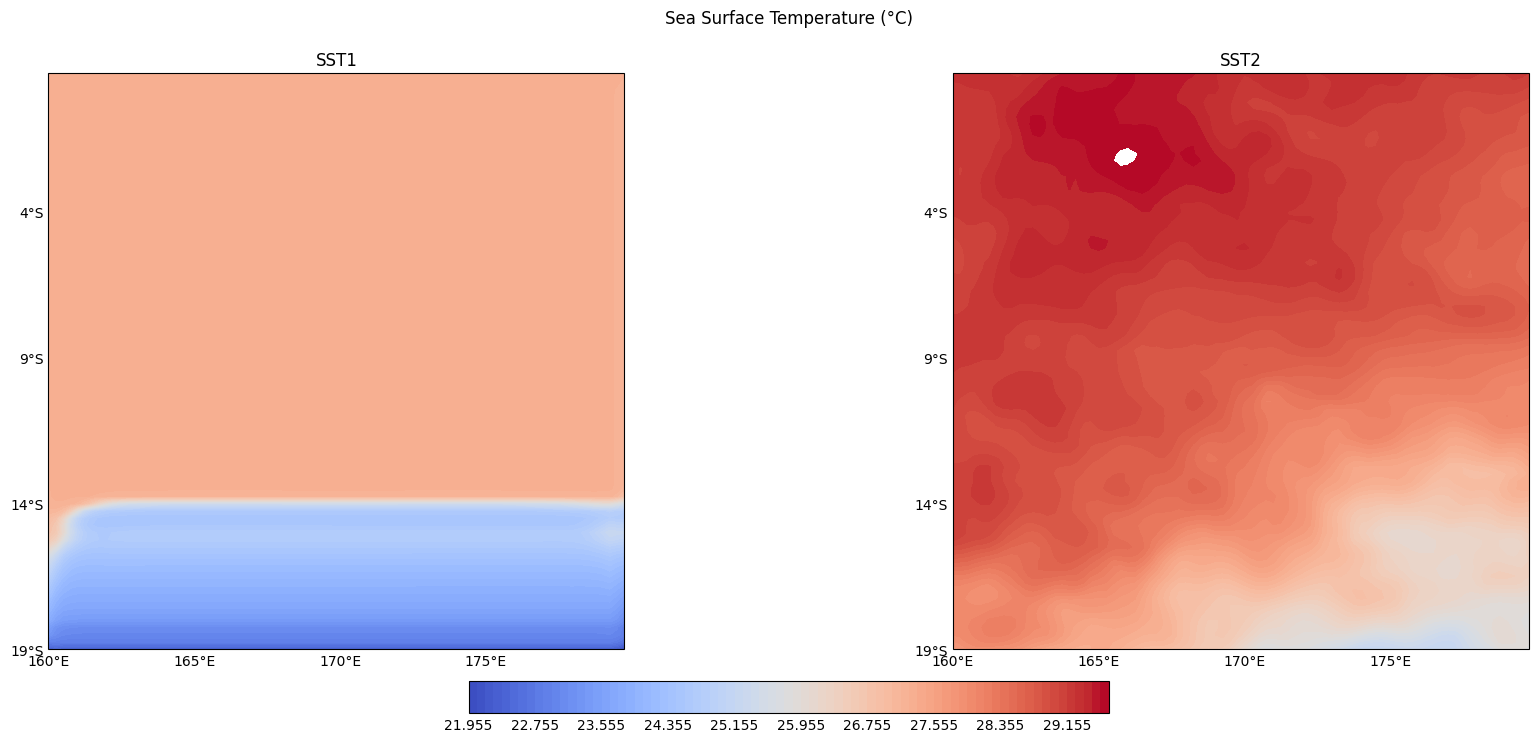

(<Figure size 2000x800 with 3 Axes>,
 (<GeoAxes: title={'center': 'SST1'}>, <GeoAxes: title={'center': 'SST2'}>))

In [11]:
# 预测
from utils.plot import plot_sst_distribution_compare # 导入绘图函数，绘制SST分布的比较图
from models.model import ssim_loss # 导入自定义的SSIM损失函数，模型训练时计算损失

from keras.src.saving import load_model  # 从Keras中导入加载模型的函数

# saved_model = load_model(MODEL_SAVE_PATH + '/Conv2DLSTMNetwork.keras', custom_objects={ 'log_cosh':losses.log_cosh, 'Conv2DLSTMNetwork': Conv2DLSTMNetwork})

y_pred = model.predict(x_test) # 使用模型进行预测

print(model.evaluate(x_test,y_test)) # x_test测试数据

print(y_pred[5, :, :, 0].shape)  # 打印第15个样本的预测结果的形状
print(y_test[5, :, :, 0].shape)

y = y_pred[5, :, :, 0]
g = y_test[5, :, :, 0]

print(y)
print(g)

# 计算RMSE
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y, g.cpu().numpy())

print("RMSE: ", rmse)

plot_sst_distribution_compare(y, g.cpu().numpy())